<a href="https://colab.research.google.com/github/kjaron83/tensorflow-tutorials/blob/master/classification/sklearn_moons_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing a classification dataset created by the Scikit-Learn's [make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function

In [57]:
#Creating data

from sklearn.datasets import make_moons

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_moons(n_samples, noise=0.03, random_state=42)

In [58]:
# Check out the features

import pandas as pd
moons = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moons

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


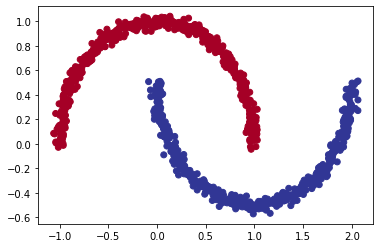

In [59]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [60]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the data
X_train.shape, X_test.shape

((800, 2), (200, 2))

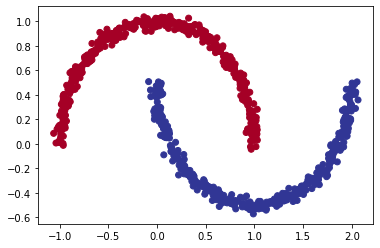

In [61]:
# Visualize X_train with a plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);

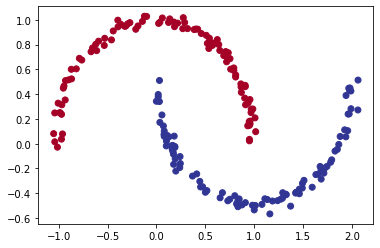

In [62]:
# Visualize X_test with a plot
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu);

In [63]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5713
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7425
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.7613
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7625
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7788
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7937
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8012
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8125
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8213
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8250
Epoch 11/20
25/25 [

In [64]:
# Check the results of the model
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.8900


[0.2515328526496887, 0.8899999856948853]

Text(0.5, 1.0, 'Model_1 training curves')

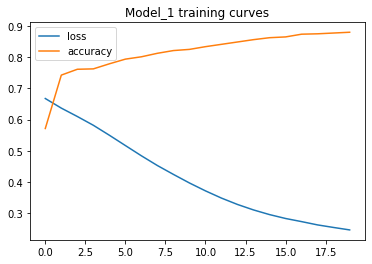

In [65]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 training curves")

In [66]:
# Finding the best learning rate

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model (passing the lr_scheduler callback)
history_2 = model_2.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5275 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5412 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5550 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5763 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6187 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6700 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.7225 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

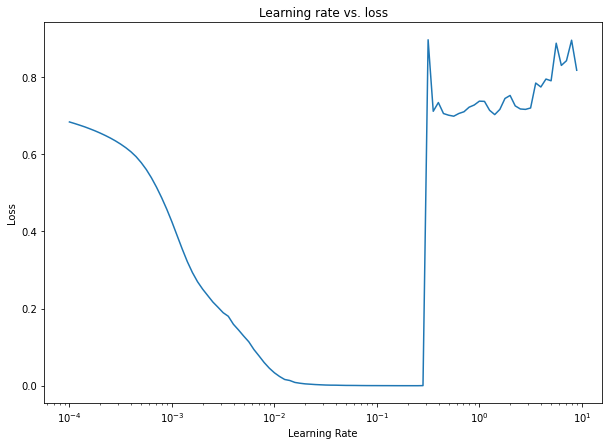

In [67]:
# Plot the learning rate versus the loss
import numpy as np

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [68]:
# The best learning rate looks like 10e-02
best_learning_rate = 10e-02
best_learning_rate

0.1

In [69]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8388
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.8950
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9312
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.9563
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9837
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 5.6631e-04 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 4.3161e-04 - accuracy: 1.0000
Epoch 11/20

In [70]:
# Check the results of the model
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 6.3078e-05 - accuracy: 1.0000


[6.307761213975027e-05, 1.0]

Text(0.5, 1.0, 'Model_3 training curves')

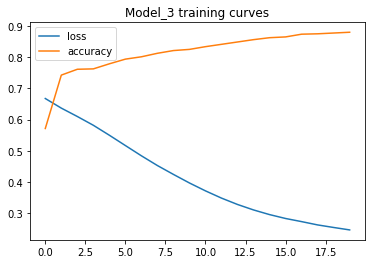

In [71]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()
plt.title("Model_3 training curves")

In [72]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...
doing binary classifcation...


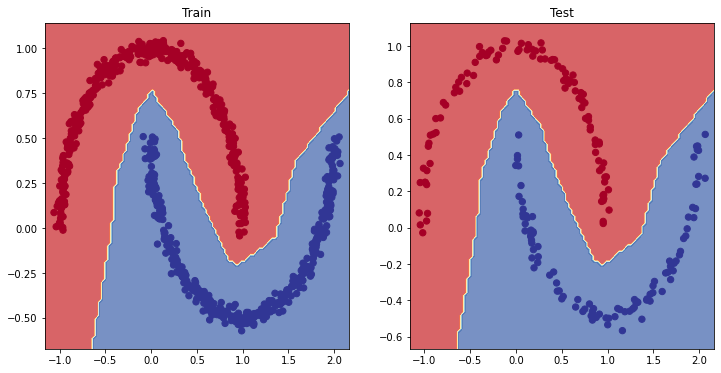

In [73]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X=X_test, y=y_test)
plt.show()